In [39]:
"""
Linear Regression using Gradient Descent
Enhanced version with Rahma's additions:
- Prints progress every N iterations
- Stores SSE values
- Visualizes both error curve and regression line
"""

import numpy as np
import matplotlib.pyplot as plt


In [40]:
X = np.array([50, 60, 70, 80, 90])
y = np.array([150, 180, 210, 240, 270])

# التطبيع
X_norm = X / 100
y_norm = y / 100



In [52]:
class LinearRegressionGD:
    
    def __init__(self, learning_rate:float =0.0000001, iterations:int =100, print_every:int =20):
        """
        Initialize learning rate and number of training iterations
        learning_rate = alpha
        iterations = number of gradient descent steps
        print_every = frequency of printing progress
        """
        self.lr = learning_rate
        self.iterations = iterations
        self.print_every = print_every
        self.w = 0      # slope
        self.b = 0      # intercept
        self.sse_values = []  # store error values over time
    
    def fit(self, x, y):
        """
        Train the model using Gradient Descent
        x = input features
        y = true target values
        """
        n = len(x)
        
        for i in range(self.iterations):
            # Predict values using current parameters
            y_hat = self.w * x + self.b
            
            # Compute gradients (partial derivatives)
            D_w = (2/n) * np.sum((y_hat - y) * x)
            D_b = (2/n) * np.sum((y_hat - y))
            
            # Update weights using learning rate
            self.w -= self.lr * D_w
            self.b -= self.lr * D_b
            
            # Compute Sum of Squared Errors (SSE)
            sse = np.sum((y_hat - y) ** 2)
            self.sse_values.append(sse)
            
            # Print progress every print_every iterations
            if (i + 1) % self.print_every == 0:
                print(f"Iteration {i+1}, SSE = {sse}")
    
    def predict(self, x_new):
        """
        Predict output for a new input value
        """
        y_pred = self.w * x_new + self.b
        return y_pred
    
    def visualize(self, x, y):
          plt.figure(figsize=(12,5))
          plt.subplot(1,2,1)
          plt.plot(range(self.iterations), self.sse_values, label='SSE')
          plt.xlabel("Iteration")
          plt.ylabel("Sum Squared Error")
          plt.title("SSE Over Training") 
          plt.legend()
          # خط الانحدار مع البيانات 
          plt.subplot(1,2,2)
          plt.scatter(x, y, color="blue", label="Data points") 
          plt.plot(x, self.w * x + self.b, color='red', label="Regression Line") 
          plt.xlabel("X") 
          plt.ylabel("Y") 
          plt.title("Linear Regression Fit") 
          plt.legend() 
          plt.show()



In [53]:
# إنشاء النموذج وتدريبه
model = LinearRegressionGD(learning_rate=0.01, iterations=1000, print_every=200)
model.fit(X_norm, y_norm)


# عرض النتائج
print("w (slope):", model.w)
print("b (intercept):", model.b)

# تنبؤ لمساحة 70 م²
x_new = 70 / 100   # نطبّع المدخل
y_pred_norm = model.predict(x_new)   # التنبؤ بالقيمة المطَبَّعة
y_pred = y_pred_norm * 100           # نرجع للوحدة الأصلية
print("Prediction for house size 70 m²:", y_pred)




Iteration 200, SSE = 0.3597587768190698
Iteration 400, SSE = 0.32316494503947546
Iteration 600, SSE = 0.2903950379745805
Iteration 800, SSE = 0.26094809956187603
Iteration 1000, SSE = 0.23448717009729433
w (slope): 1.4725405863550418
b (intercept): 1.083703439921255
Prediction for house size 70 m²: 211.4481850369784


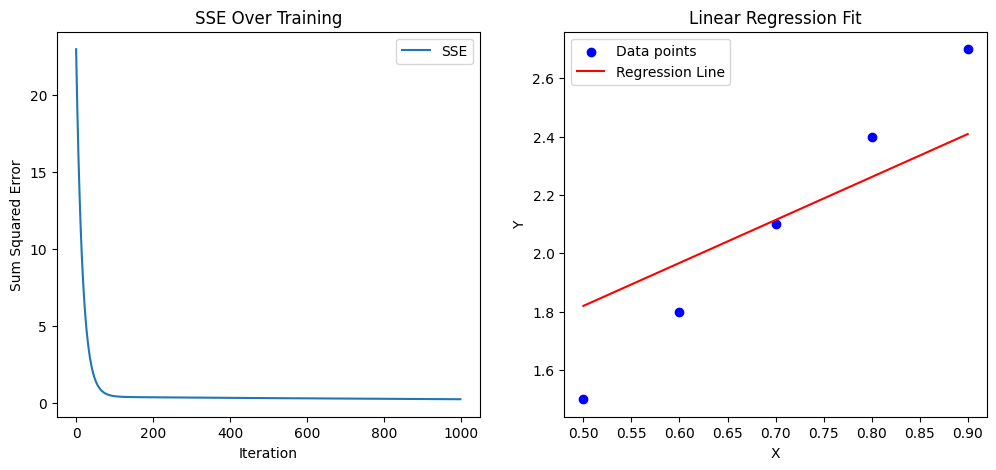

In [54]:
model.visualize(X_norm, y_norm)
